# Import relevant libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

# preprocessing modules
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import KNNImputer

# pipeline constructors
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import set_config

# model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# ML algorithm libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.base import BaseEstimator, TransformerMixin
set_config(display="diagram")

# Loading training and test dataset

In [34]:
# specifying directories
main_dir = "D:/Books/Machine Learning/Real_World_project/Titanic/dataset/"     # main directory of the dataset
train_dir = os.path.join(main_dir, 'train.csv')


In [35]:
# loading the datasets
train = pd.read_csv(train_dir)      
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Preprocessing steps

In [36]:
# the number of NaN values in the training set per column
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [37]:
# droping non-significant columns
train = train.drop(['Name','Ticket', 'PassengerId', 'Embarked'], axis=1)       

# filling NaN values in the 'Cabin' column. if a passenger had a cabin, map to 1, else map to 0
train['Cabin'] = train['Cabin'].apply(lambda x: 1 if type(x) is str else 0)

# Feature engineering

In [38]:
train['Relatives'] = train['SibSp'] + train['Parch']
train.drop(['SibSp', 'Parch'], inplace=True, axis=1)
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Relatives
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,1
2,1,3,female,26.0,7.9250,0,0
3,1,1,female,35.0,53.1000,1,1
4,0,3,male,35.0,8.0500,0,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,0
887,1,1,female,19.0,30.0000,1,0
888,0,3,female,NaN,23.4500,0,3
889,1,1,male,26.0,30.0000,1,0


# Data Preprocessing

In [39]:
# splitting the training dataset into X_train and y_train
X_train = train.drop(['Survived'], axis=1)
y_train = train[['Survived']]


Text(0.5, 1.0, 'No of Survived vs. No of Died passenger')

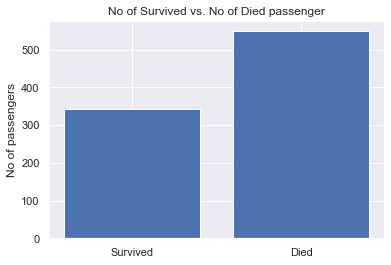

In [40]:
# Plotting a bar chart for specifying how balanced is the training set 
plt.bar(['Survived', 'Died'],
        [sum(y_train['Survived']==1), sum(y_train['Survived']==0.)])
plt.ylabel('No of passengers')
plt.title('No of Survived vs. No of Died passenger')

<BarContainer object of 2 artists>

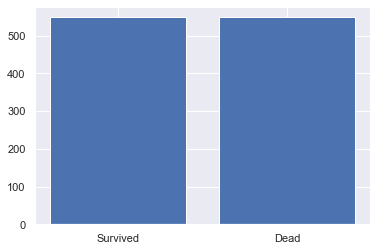

In [41]:
# oversampling the training set to balance the data
X_train, y_train = RandomOverSampler(sampling_strategy=1.).fit_resample(X_train, y_train)

# plotting the bar chart after oversampling
plt.bar(['Survived', 'Dead'], [sum(y_train['Survived']==1), sum(y_train['Survived']==0.)])



# Pipeline configuration

### Pipeline with LogisticRegression model

In [42]:
# utilizing the KNNImputer to fill the NaN values for the 'Age' column
pipe1 = make_pipeline((KNNImputer()))

# utilizing the OneHotEncoder to encode the 'Sex' column
pipe2 = make_pipeline(OneHotEncoder(drop='first'))

# creating a column transformer
column_trf = make_column_transformer((pipe1, ['Age']),
                                     (pipe2, ['Sex']), 
                                     remainder='passthrough')

# Creating the final Pipeline while employing the Losgistic Regression model as the estimator
pipe_lr = make_pipeline(column_trf, StandardScaler(), LogisticRegression())
pipe_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer())]),
                                                  ['Age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [43]:
param_grid = {'columntransformer__pipeline-1__knnimputer__n_neighbors': np.logspace(1, 3, 3, base= 5, dtype=np.int32),
              'logisticregression__C': np.logspace(-2,2, 5)}
gs_lr = GridSearchCV(pipe_lr, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
gs_lr.fit(X_train, y_train.squeeze())

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer())]),
                                                                         ['Age']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Sex'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'columntransformer__pipeline-1__knnimputer__n_neighbors': array([  5,  25, 125]),
                         'logisticregression__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             verbose=1)

In [44]:
print('Using the LR and GridSearchCV best score equals', round(gs_lr.best_score_*100, 2), '%')

Using the LR and GridSearchCV best score equals 78.14 %


### Pipeline with RandomForestClassifier model

In [45]:
# utilizing the KNNImputer to fill the NaN values for the 'Age' column
pipe1 = make_pipeline((KNNImputer()))

# utilizing the OneHotEncoder to encode the 'Sex' column
pipe2 = make_pipeline(OneHotEncoder(drop='first'))

# creating a column transformer
column_trf = make_column_transformer((pipe1, ['Age']),
                                     (pipe2, ['Sex']), 
                                     remainder='passthrough')

# Creating the final Pipeline while employing the Randomm Forest model as the estimator
pipe_rf = make_pipeline(column_trf, StandardScaler(), RandomForestClassifier())
pipe_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer())]),
                                                  ['Age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [46]:
param_grid = {'columntransformer__pipeline-1__knnimputer__n_neighbors': np.logspace(1, 4, 8, base=3, dtype=np.int32),
              'randomforestclassifier__max_depth': np.logspace(1, 3, 3, base=5, dtype=np.int32),
              'randomforestclassifier__n_estimators': np.logspace(1, 3, 3, base=5, dtype=np.int32)}
gs_rf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
gs_rf.fit(X_train, y_train.squeeze())

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer())]),
                                                                         ['Age']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Sex'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'columntransformer__pipeline-1__knnimputer__n_neighbors': array([ 3,  4,  7, 12, 19, 31, 50, 81]),
                         'randomforestclassifier__max_depth': array([  5,  25, 125]),
                         'randomforestclassifier__n_estimators': array([  5,  25, 125])},
             verbose=1)

In [47]:
print('Using RF and GridSearchCV best score equals', round(gs_rf.best_score_*100, 2), '%')

Using RF and GridSearchCV best score equals 87.8 %
